# Projeto de Implementação 2

**Aluno:** Igor Carvalho da Silva  
**Matrícula:** 21951288

**Aluno:** Erlon Pereira Bié  
**Matrícula:** 21953823

## Configurando Google Cloud CLI

In [ ]:
!gcloud --version

Google Cloud SDK 412.0.0


In [ ]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=lgquT8NMWfZkmGefAZhAgFR2MruHmf&prompt=consent&access_type=offline&code_challenge=YiXE3Id4ipkTvRuxUWdsMnk-9lbCcYdo9cyemXIyjbE&code_challenge_method=S256

Enter authorization code: 4/0AWgavdcwZgYImTUr8_fetnRjuBxrORtre5b0yUr6kx9la9VzBryHYP5lC4DKY9dxDCR8rw

You are now logged in as [erlonminievix@gmail.com].
Your current project is [methodical-rope-372514].  You can change this setting by running:
  $ gcloud config set pr

In [ ]:
!gcloud config set project methodical-rope-372514

Updated property [core/project].


## Criando Cluster

In [ ]:
!(gcloud dataproc clusters create erlon-igor \
 --project methodical-rope-372514 \
 --region us-central1 --subnet default --zone us-central1-c \
 --master-machine-type n1-standard-1 --master-boot-disk-size 32 \
 --num-workers 5 --worker-machine-type n1-standard-1 \
 --worker-boot-disk-size 32 --image-version 1.4-ubuntu18 \
 --optional-components ANACONDA,JUPYTER --bucket ufam-bucket-erlon-igor)

Waiting on operation [projects/methodical-rope-372514/regions/us-central1/operations/94bd0504-d3e2-3c83-9197-bb7564cadf77].

Created [https://dataproc.googleapis.com/v1/projects/methodical-rope-372514/regions/us-central1/clusters/erlon-igor] Cluster placed in zone [us-central1-c].


In [ ]:
!gcloud config set dataproc/region us-central1

Updated property [dataproc/region].


### Testando Cluster

In [ ]:
!gsutil cp gs://la-gcp-labs-resources/data-engineer/dataproc/wordcount.py .

Copying gs://la-gcp-labs-resources/data-engineer/dataproc/wordcount.py...
/ [1 files][  443.0 B/  443.0 B]                                                
Operation completed over 1 objects/443.0 B.                                      


In [ ]:
!gcloud dataproc jobs submit pyspark wordcount.py \
--cluster=erlon-igor -- \
gs://la-gcp-labs-resources/data-engineer/dataproc/romeoandjuliet.txt \
gs://ufam-bucket-erlon-igor/output/

Job [7d044f7f965e4dad8b8c27e0203865c1] submitted.
Waiting for job output...
22/12/23 21:20:12 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
22/12/23 21:20:12 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
22/12/23 21:20:12 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator
22/12/23 21:20:12 INFO org.spark_project.jetty.util.log: Logging initialized @5298ms to org.spark_project.jetty.util.log.Slf4jLog
22/12/23 21:20:12 INFO org.spark_project.jetty.server.Server: jetty-9.4.z-SNAPSHOT; built: unknown; git: unknown; jvm 1.8.0_312-b07
22/12/23 21:20:13 INFO org.spark_project.jetty.server.Server: Started @5481ms
22/12/23 21:20:13 INFO org.spark_project.jetty.server.AbstractConnector: Started ServerConnector@65d21ac6{HTTP/1.1, (http/1.1)}{0.0.0.0:4040}
22/12/23 21:20:13 WARN org.apache.spark.scheduler.FairSchedulableBuilder: Fair Scheduler configuration file not found so jobs will be scheduled in FIFO order. To use fair scheduling, configure poo

In [ ]:
!gsutil cat gs://ufam-bucket-erlon-igor/output/*

('PERSONAE', 1)
('ESCALUS', 1)
('prince', 6)
('of', 364)
('young', 17)
('nobleman,', 1)
('kinsman', 6)
('prince.', 2)
('MONTAGUE', 17)
('|', 9)
('two', 15)
('houses', 1)
('at', 63)
('CAPULET', 104)
('Capulet.', 6)
('son', 11)
('MERCUTIO', 65)
('BENVOLIO', 68)
('nephew', 2)
('Montague,', 8)
('TYBALT', 20)
('Lady', 2)
('FRIAR', 72)
('LAURENCE', 59)
('Franciscans.', 1)
('BALTHASAR', 13)
('SAMPSON', 22)
('PETER', 14)
('(Apothecary:)', 1)
('Three', 3)
('Musicians.', 1)
('Musician:)', 3)
('Paris;', 3)
('Page;', 1)
('an', 64)
('officer.', 1)
('daughter', 6)
('Nurse', 92)
('(Nurse:)', 1)
('Verona;', 2)
('several', 2)
('Women,', 1)
('both', 13)
('houses;', 1)
('Guards,', 1)
('Chorus.', 1)
('SCENE', 25)
('Verona:', 2)
('Two', 4)
('alike', 1)
('in', 280)
('dignity,', 1)
('where', 21)
('we', 48)
('scene,', 1)
('ancient', 8)
('grudge', 1)
('new', 12)
('unclean.', 1)
('fatal', 4)
('loins', 1)
('these', 36)
('foes', 1)
("star-cross'd", 1)
('take', 32)
('life;', 2)
('Whole', 1)
('misadventured', 1)
('

## Conectando o notebook com o Cluster
Por limitações de uso das portas da instancia do google collaboratory a parte de conexão via SSH foi feita localmente e o notebook foi conectado com a porta da máquina local.

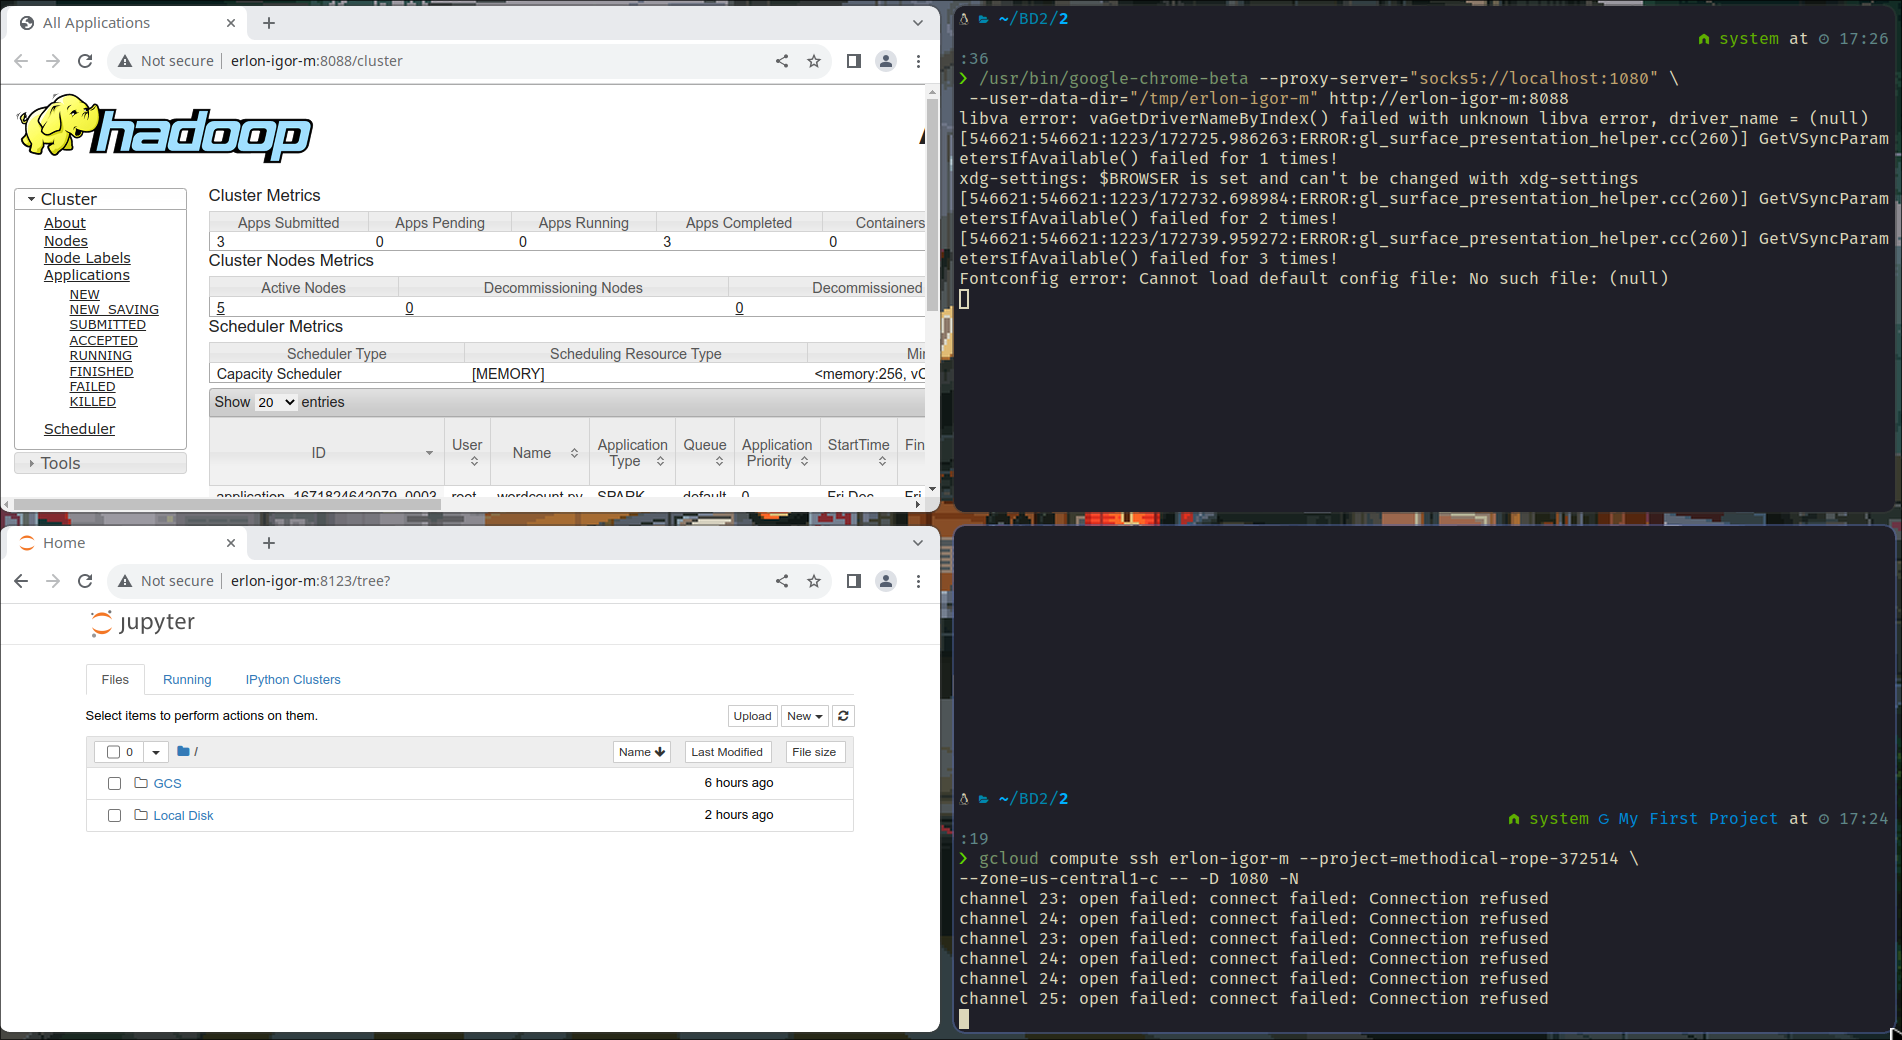

Fizemos a conexão com o Jupyter dentro do Cluster usando o tutorial em https://medium.com/@senthilnathangautham/colab-gcp-compute-how-to-link-them-together-98747e8d940e

## Base de dados
Para facilitar a execução o arquivo (https://snap.stanford.edu/data/web-BerkStan.txt.gz) foi armazenado dentro do Bucket criado.

## PageRank

In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName("PageRanking")
sc = SparkContext(conf = conf)

In [ ]:
rdd = sc.textFile("gs://ufam-bucket-erlon-igor/web-BerkStan.txt")

In [ ]:
pair = rdd.filter(lambda line: "#" not in line).map(lambda line:line.split("\t"))

In [ ]:
links = pair.map(lambda x: [x[0],[x[1]]]).reduceByKey(lambda a,b: a+b)

In [ ]:
ranks = links.map(lambda x: (x[0],1))

In [ ]:
ranks_colection = ranks.collect()

In [ ]:
NUM_ITERATIONS = 8

In [ ]:
for i in range(NUM_ITERATIONS):
  def compute_contribs(pair):
    [url, [links, rank]] = pair  # split key-value pair
    return [(dest, rank / len(links)) for dest in links]

  contribs = links.join(ranks).flatMap(compute_contribs)
  ranks = contribs.reduceByKey(lambda x, y: x + y).mapValues(
      lambda x: 0.15 + 0.85 * x
  )
ranks = ranks.sortBy(lambda x: -x[1])


In [ ]:
top_100 = ranks.collect()[:100]
top_100

[('272919', 6406.382416723803),
 ('438238', 4213.040242668467),
 ('571448', 2318.801367085997),
 ('601656', 2148.2062864107324),
 ('316792', 1818.849614733838),
 ('319209', 1574.1636165696118),
 ('184094', 1481.5022961790653),
 ('571447', 1452.8117162735982),
 ('401873', 1391.1164091455282),
 ('66244', 1261.8427117551485),
 ('68949', 1261.0560718369613),
 ('68948', 1251.4342067202685),
 ('68947', 1235.5566401597205),
 ('86239', 1235.5566401597205),
 ('77284', 1235.5566401597205),
 ('68946', 1235.5566401597205),
 ('86237', 1235.5566401597205),
 ('96070', 1235.5566401597205),
 ('95551', 1235.5566401597205),
 ('95552', 1235.5566401597205),
 ('66909', 1235.5566401597205),
 ('86238', 1235.5566401597205),
 ('284306', 1220.3539632621805),
 ('768', 1186.6173736857259),
 ('927', 1088.3922730356355),
 ('49176', 922.487738405645),
 ('95527', 919.9420312516194),
 ('100130', 916.2801177022753),
 ('101163', 912.7978102372297),
 ('95018', 911.4423625935065),
 ('100646', 909.9682760642507),
 ('96045',

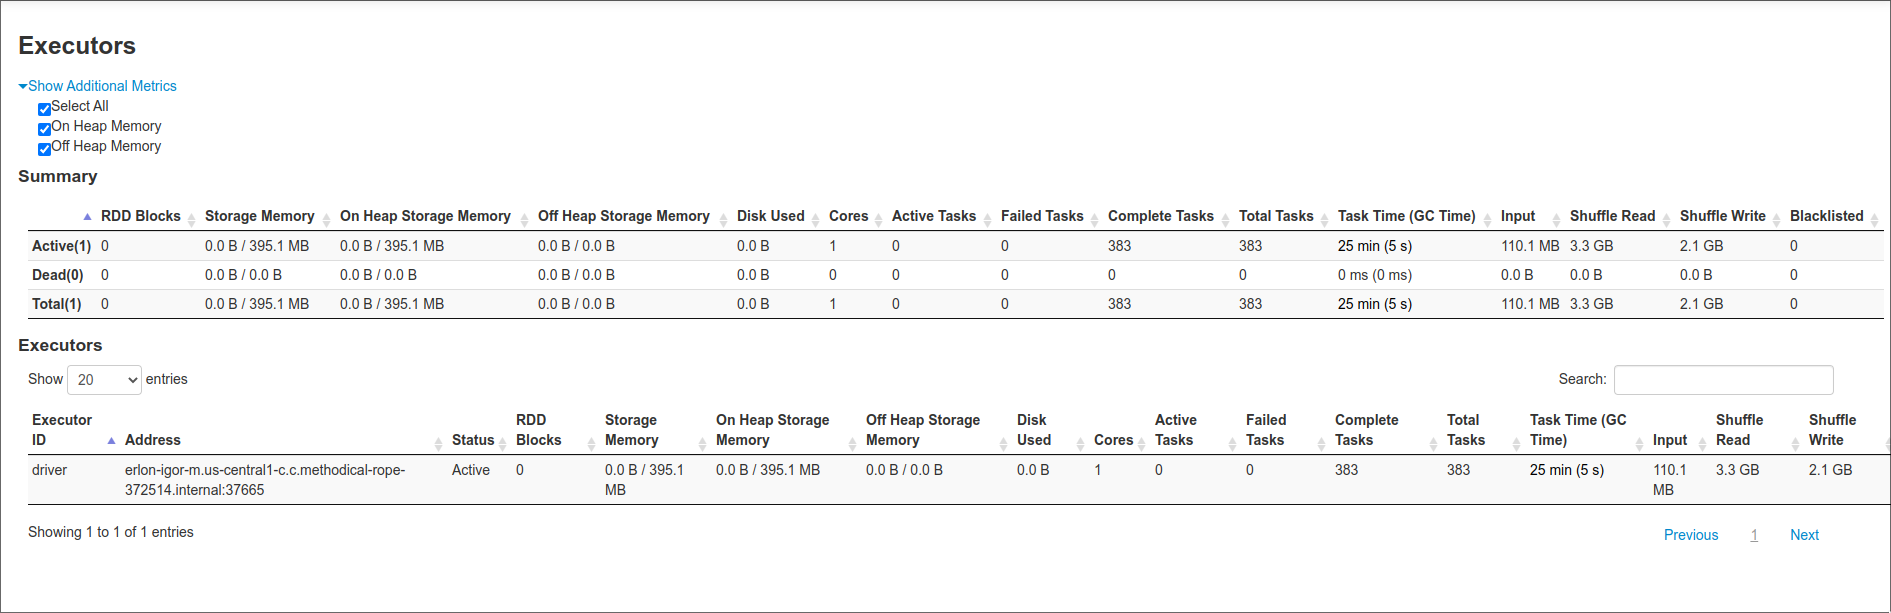